## Joanna Piega 
# Praca domowa 2


# Budowa modelu

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_stata("data.dta")

Zmienne, na podstawie których zostanie zbudowany model to:
    * q26 - odpowiada za informację czy partnerzy byli studentami jednej uczelni
    * ppeducat - odpowiada za poziom wykształcenia
    * q24_met_online - czy partnerzy poznali się online
    * how_long_relationship - jak długo trwa związek
    * age_difference - jaka jest różnica wieku między partnerami

## Przekształcenie danych na dane numeryczne

In [48]:
data = data[["s1","age_difference","q26","ppeducat","q24_met_online","how_long_relationship","q16"]]
data = data[data.isnull().sum(axis = 1) == 0]
data.q24_met_online = pd.Categorical(data.q24_met_online).codes
data.ppeducat = pd.Categorical(data.ppeducat).codes
data.q26 = pd.Categorical(data.q26).codes
data.s1 = pd.Categorical(data.s1).codes

## Podział danych na zbiór treningowy i testowy

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,1:6],data.s1, test_size = 0.10, random_state = 0)

## Stworzenie modelu predykcyjnego - XGBoost

In [50]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=10)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

## Ocena jakości zbudowanego modelu

Accuracy

In [51]:
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, [round(i) for i in y_pred]),2)*100

75.0

# Wyjaśnienie modelu

## PD plot

In [52]:
def PD(model, index, points, X):
    Tab=X.copy()
    prob=list()
    for point in points:
        Tab.iloc[:,index]=[point]*Tab.shape[0]
        prob.append(pd.DataFrame(model.predict_proba(Tab)).iloc[:,0].mean())
    plt.plot(points, prob)
    plt.show()
          

## age_difference

In [53]:

index=0
points=np.arange(0, 25, 1)

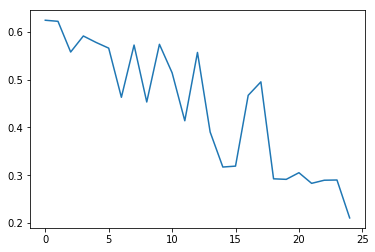

In [54]:
PD(model, index, points,X_test)

## how_long_relationship

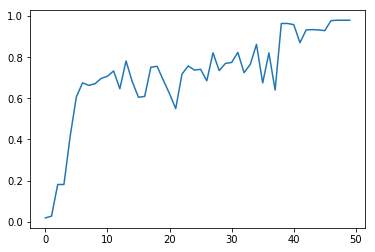

In [66]:
index=4
points=np.arange(0, 50, 1)
PD(model, index, points,X_test)

## Marginal plot

In [63]:
def MP(model, index, points, X):
    Tab=X.copy()
    prob=list()
    for point in points:
        prob.append(pd.DataFrame(model.predict_proba(Tab[Tab[Tab.columns[index]]==point])).iloc[:,0].mean())
    plt.plot(points, prob)
    plt.show()

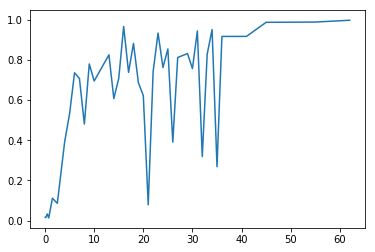

In [73]:
index=4
points=np.unique(X_test["how_long_relationship"])
MP(model, index, points,X_test)

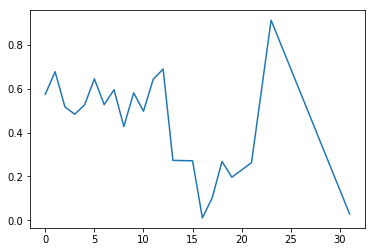

In [72]:
index=0
points=np.unique(X_test["age_difference"])
MP(model, index, points,X_test)